#NetAI新生訓練營-Pytorch基礎教學

---


作者：
李旻昊 — 國立成功大學，敏求智慧運算學院

本筆記將介紹
**Pytorch** — 強大的深度學習框架


* 安裝Pyotrch GPU/CPU版本

* Tensor基本操作

* 梯度下降

* 建立我們第一個神經網絡

* 訓練技巧





# 安裝Pyotrch GPU/CPU版本

Pytorch 可以使用conda 或CPU安裝

更多的細節請查看: https://pytorch.org/get-started/locally/

## CPU版本安裝


Windows :
```
pip install torch torchvision torchaudio
# or
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu
#or
conda install pytorch torchvision torchaudio cpuonly -c pytorch
```
Linux :


```
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu
#or
conda install pytorch torchvision torchaudio cpuonly -c pytorch
```




## GPU版本安裝
你需要檢查目前環境的CUDA版本

例如 colab T4-GPU目前的CUDA版本為12.2


```
nvcc -V
```



In [ ]:
!nvcc -V

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


安裝相容版本的pytorch

```
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
```



##安裝cuda-toolkit

如果你需要在**虛擬環境**更改固定版本的**NVCC**(NVIDIA CUDA Complier)

例如是公用server，你不一定有權限能夠更改系統**NVCC**版本
你可以嘗試以conda安裝有關的cuda-toolkit達到此效果

細節請查閱:https://anaconda.org/nvidia/cuda-toolkit
## NVCC -V 12.4
```
conda install nvidia/label/cuda-12.4.0::cuda-toolkit
```

## NVCC -V 11.8



```
conda install nvidia/label/cuda-11.8.0::cuda-toolkit
```





## 為什麼我們需要GPU???

應該有人聽過＂GPU能高效進行矩陣運算,所以高效地進行深度學習任務＂

現在我們嘗試一下GPU和CPU在矩陣運算的效率差距吧!

In [ ]:
import time
import torch
# 默認使用CPU計算
N = 2500
a = torch.rand(N,N)

# 矩陣內積
start = time.monotonic()
b = torch.matmul(a,a)
end = time.monotonic()
cost_cpu = end - start
print(f"CPU計算時間: {cost_cpu:4f}s")
del b

# 改用GPU進行計算
if torch.cuda.is_available():
  a = a.cuda()

  # 矩陣內積
  start = time.monotonic()
  b = torch.matmul(a,a)
  end = time.monotonic()
  cost_gpu = end - start
  print(f"GPU計算時間: {cost_gpu:4f}s")

  print(f"CPU計算時間為GPU的 {round(cost_cpu/cost_gpu, 2)}倍")
  del b

else:
  print("GPU不可用")

del a

CPU計算時間: 0.285726s
GPU計算時間: 0.104958s
CPU計算時間為GPU的 2.72倍


#準備:
import package

In [ ]:
import torch
import numpy as np

import matplotlib.pyplot as plt
from tqdm.auto import tqdm

## 檢查 torch版本和 GPU可用性

In [ ]:
print(torch.__version__)
print("GPU 可用性:", torch.cuda.is_available())

2.4.0+cu121
GPU 可用性: True


#Tensor基本操作

numpy 和 torch有著很多的相似之處

接下來會說明

* 基本tensor建立方法
* numpy 和 torch的轉換操作

* tensor基本運算

參數設定

In [ ]:
#### int ####
Scalar_1_int = 1
Scalar_2_int = 2

Vector_1_int = [1,2,3]
Vector_2_int = [4,5,6]

Matrix_1_int = [[1,2,3],[4,5,6],[7,8,9]]
Matrix_2_int = [[9,8,7],[6,5,4],[3,2,1]]

#### float ####
Scalar_1_float = 1.0
Scalar_2_float = 2.0

Vector_1_float = [1.0,2.0,3.0]
Vector_2_float = [4.0,5.0,6.0]

Matrix_1_float = [[1.0,2.0,3.0],[4.0,5.0,6.0],[7.0,8.0,9.0]]
Matrix_2_float = [[9.0,8.0,7.0],[6.0,5.0,4.0],[3.0,2.0,1.0]]

##基本tensor建立方法

###Float Tensor
dtype為浮點的tensor，大多用於梯度下降等情況

In [ ]:
tensor_float_1 = torch.tensor(Vector_1_float)
tensor_float_2 = torch.FloatTensor(Vector_1_int)
tensor_float_3 = torch.tensor(Vector_1_int, dtype=torch.float)
tensor_float_4 = torch.tensor(Vector_1_int).type(torch.float)

# 檢查dtype是否為float
check_float = all([tensor_float_1.dtype==torch.float,
          tensor_float_2.dtype==torch.float,
          tensor_float_3.dtype==torch.float,
          tensor_float_4.dtype==torch.float])
print('All tensor dtype is "torch.float":', check_float)
tensor_float_1

All tensor dtype is "torch.float": True


tensor([1., 2., 3.])

### Long Tensor

dtype為整數的tensor，大多情況不支持梯度下降

In [ ]:
tensor_int_1 = torch.tensor(Vector_1_int)
tensor_int_2 = torch.LongTensor(Vector_1_int)
tensor_int_3 = torch.tensor(Vector_1_int, dtype=torch.long)
tensor_int_4 = torch.tensor(Vector_1_int).type(torch.long)

# 檢查dtype是否為int
check_int = all([tensor_int_1.dtype==torch.long,
          tensor_int_2.dtype==torch.long,
          tensor_int_3.dtype==torch.long,
          tensor_int_4.dtype==torch.long])
print('All tensor dtype is "torch.long":', check_int)
tensor_int_1

All tensor dtype is "torch.long": True


tensor([1, 2, 3])

###Numpy-type API

#### arange()

In [ ]:
#torch.arange()
arange_int = torch.arange(3, 12)
print(arange_int, arange_int.dtype)

arange_float = torch.arange(10, dtype=torch.float)
print(arange_float, arange_float.dtype)

tensor([ 3,  4,  5,  6,  7,  8,  9, 10, 11]) torch.int64
tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]) torch.float32


#### ones()

In [ ]:
#torch.ones()
ones_int = torch.ones((3, 3), dtype=torch.int)
print(ones_int, ones_int.dtype)

ones_float = torch.ones((3, 3), dtype=torch.float)
print(ones_float, ones_float.dtype)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int32) torch.int32
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]) torch.float32


#### zeros()

In [ ]:
#torch.zeros()
zeros_int = torch.zeros((3, 3), dtype=torch.int)
print(zeros_int, zeros_int.dtype)

zeros_float = torch.zeros((3, 3), dtype=torch.float)
print(zeros_float, zeros_float.dtype)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]], dtype=torch.int32) torch.int32
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]) torch.float32


#### rand() & randn() &randint()

正態分布: randn()

均勻分布: rand()

整數均勻分布: randint()

In [ ]:
#torch.randn()
print("\ntorch.randn")
randn_float = torch.randn(3, 3, dtype=torch.float)
print(randn_float, randn_float.dtype)

#torch.rand()
print("\ntorch.randn")
rand_float = torch.rand(3, 3, dtype=torch.float)
print(rand_float, rand_float.dtype)

#torch.randint()
print("\ntorch.randit")
randint_int = torch.randint(1, 10, (3,3))
print(randint_int, randint_int.dtype)

randint_float = torch.randint(1, 10, (3,3), dtype=torch.float)
print(randint_float, randint_float.dtype)


torch.randn
tensor([[-1.7743,  0.9435, -0.2668],
        [ 0.5687,  0.8784, -0.7980],
        [ 0.8595, -1.6431,  0.7400]]) torch.float32

torch.randn
tensor([[0.7508, 0.0622, 0.3817],
        [0.1601, 0.8139, 0.4200],
        [0.4303, 0.3577, 0.7300]]) torch.float32

torch.randit
tensor([[6, 8, 9],
        [7, 2, 8],
        [7, 4, 9]]) torch.int64
tensor([[6., 1., 8.],
        [4., 6., 1.],
        [3., 1., 3.]]) torch.float32


### API_like API

#### ones_like()

In [ ]:
#torch.ones_like()
print("org_tensor", tensor_int_1)

ones_like_int = torch.ones_like(tensor_int_1)
print(ones_like_int, ones_like_int.dtype, ones_like_int.size()==tensor_int_1.size())

ones_like_float = torch.ones_like(tensor_float_1)
print(ones_like_float, ones_like_float.dtype, ones_like_float.size()==tensor_int_1.size())

org_tensor tensor([1, 2, 3])
tensor([1, 1, 1]) torch.int64 True
tensor([1., 1., 1.]) torch.float32 True


####zeros_like()

In [ ]:
#torch.zeros_like()
print("org_tensor", tensor_int_1)

zeros_like_int = torch.zeros_like(tensor_int_1)
print(zeros_like_int, zeros_like_int.dtype, zeros_like_int.size()==tensor_int_1.size())

zeros_like_float = torch.zeros_like(tensor_float_1)
print(zeros_like_float, zeros_like_float.dtype, zeros_like_float.size()==tensor_int_1.size())

org_tensor tensor([1, 2, 3])
tensor([0, 0, 0]) torch.int64 True
tensor([0., 0., 0.]) torch.float32 True


####rand_like() & randn_like() &randint_like()
正態分布: randn_like()

均勻分布: rand_like()

整數均勻分布: randint_like()

In [ ]:
print("org_tensor", tensor_float_1)

#torch.randn()
print("\ntorch.randn")
randn_like_float = torch.randn_like(tensor_float_1)
print(randn_float, randn_float.dtype)

#torch.rand()
print("\ntorch.randn")
rand_like_float = torch.rand_like(tensor_float_1)
print(rand_like_float, rand_like_float.dtype)

#torch.randint()
print("\ntorch.randit")
randint_like_int = torch.randint_like(tensor_int_1, 0, 9)
print(randint_like_int, randint_like_int.dtype)

randint_like_float = torch.randint_like(tensor_float_1, 0, 9)
print(randint_like_float, randint_like_float.dtype)

org_tensor tensor([1., 2., 3.])

torch.randn
tensor([[-1.7743,  0.9435, -0.2668],
        [ 0.5687,  0.8784, -0.7980],
        [ 0.8595, -1.6431,  0.7400]]) torch.float32

torch.randn
tensor([0.3947, 0.5858, 0.5711]) torch.float32

torch.randit
tensor([6, 1, 6]) torch.int64
tensor([2., 3., 8.]) torch.float32


## numpy 和 torch的轉換操作

In [ ]:
numpy_int = np.array(Matrix_1_int)
numpy_float = np.array(Matrix_1_float)

tensor_int = torch.tensor(Matrix_1_int)
tensor_float = torch.tensor(Matrix_1_float)

#### numpy -> tensor 轉換

In [ ]:
numpy_to_tensor_int = torch.tensor(numpy_int) #torch.from_numpy(numpy_int)
numpy_to_tensor_float = torch.tensor(numpy_float) #torch.from_numpy(numpy_float)

print(numpy_to_tensor_int, numpy_to_tensor_int.dtype)
print(numpy_to_tensor_float, numpy_to_tensor_float.dtype)

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]) torch.int64
tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]], dtype=torch.float64) torch.float64


####tensor->numpy  轉換

In [ ]:
tensor_to_tensor_int = tensor_int.numpy()
tensor_to_tensor_float = tensor_float.numpy()

print(tensor_to_tensor_int, tensor_to_tensor_int.dtype)
print(tensor_to_tensor_float, tensor_to_tensor_float.dtype)

[[1 2 3]
 [4 5 6]
 [7 8 9]] int64
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]] float32


## tensor基本運算

* 基本運算

* Numpy-type API

#### 基本運算

In [ ]:
#加法
print("Addition:", tensor_int + numpy_to_tensor_int)
print("Addition_API:", torch.add(tensor_int, numpy_to_tensor_int))

#減法
print("Subtaction:", tensor_int - numpy_to_tensor_int)
print("Subtaction_API:", torch.sub(tensor_int, numpy_to_tensor_int))

#乘法
print("Multiplication:", tensor_int * numpy_to_tensor_int)
print("Multiplication_API:", torch.mul(tensor_int, numpy_to_tensor_int))

#除法
print("Division:", tensor_int / numpy_to_tensor_int)
print("Division_API:", torch.div(tensor_int, numpy_to_tensor_int))

#矩陣乘法
print("Matrix Multiplication:", tensor_int @ numpy_to_tensor_int)
print("Matrix Multiplication_API:", torch.matmul(tensor_int, numpy_to_tensor_int))
#

Addition: tensor([[ 2,  4,  6],
        [ 8, 10, 12],
        [14, 16, 18]])
Addition_API: tensor([[ 2,  4,  6],
        [ 8, 10, 12],
        [14, 16, 18]])
Subtaction: tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])
Subtaction_API: tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])
Multiplication: tensor([[ 1,  4,  9],
        [16, 25, 36],
        [49, 64, 81]])
Multiplication_API: tensor([[ 1,  4,  9],
        [16, 25, 36],
        [49, 64, 81]])
Division: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
Division_API: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
Matrix Multiplication: tensor([[ 30,  36,  42],
        [ 66,  81,  96],
        [102, 126, 150]])
Matrix Multiplication_API: tensor([[ 30,  36,  42],
        [ 66,  81,  96],
        [102, 126, 150]])


####Numpy-type API

統計量

In [ ]:
#平均
print("Mean:", tensor_float.mean(axis=1))
print("Mean_API:", torch.mean(tensor_float, axis=1))

#標準差
print("Standard Deviation:", tensor_float.std(axis=1))
print("Standard Deviation_API:", torch.std(tensor_float, axis=1))

#方差
print("Variance:", tensor_float.var(axis=1))
print("Variance_API:", torch.var(tensor_float, axis=1))

#最大值
print("Max:", tensor_int.max())
print("Max_API:", torch.max(tensor_int))

#最小值
print("Min:", tensor_int.min())
print("Min_API:", torch.min(tensor_int))

#Argmin
print("Argmin", tensor_int.argmin(axis=1))
print("Argmin_API:", torch.argmin(tensor_int, axis=1))

#Argmax
print("Argmax", tensor_int.argmax(axis=1))
print("Argmax_API:", torch.argmax(tensor_int, axis=1))

Mean: tensor([2., 5., 8.])
Mean_API: tensor([2., 5., 8.])
Standard Deviation: tensor([1., 1., 1.])
Standard Deviation_API: tensor([1., 1., 1.])
Variance: tensor([1., 1., 1.])
Variance_API: tensor([1., 1., 1.])
Max: tensor(9)
Max_API: tensor(9)
Min: tensor(1)
Min_API: tensor(1)
Argmin tensor([0, 0, 0])
Argmin_API: tensor([0, 0, 0])
Argmax tensor([2, 2, 2])
Argmax_API: tensor([2, 2, 2])


進階操作

In [ ]:
print("org: ")
print(tensor_float)

tensor_float_T = tensor_float.T
print("transposes: ")
print(tensor_float_T)

tensor_float_concat = torch.cat((torch.tensor([11,12,13]),
                  torch.tensor([14,15,16]),
                  torch.tensor([17,18,19])
                  )).reshape(3, 3)
print("concat: ")
print(tensor_float_concat)

tensor_float_stack = torch.stack((torch.tensor([11,12,13]),
                  torch.tensor([14,15,16]),
                  torch.tensor([17,18,19])
                  ))
print("stack: ")
print(tensor_float_stack)

org: 
tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])
transposes: 
tensor([[1., 4., 7.],
        [2., 5., 8.],
        [3., 6., 9.]])
concat: 
tensor([[11, 12, 13],
        [14, 15, 16],
        [17, 18, 19]])
stack: 
tensor([[11, 12, 13],
        [14, 15, 16],
        [17, 18, 19]])


# 梯度下降
Pytorch擁有自動求導工具箱—autograd

他能高效對function進行求導

##簡單求導

以$f(x) = (x-2)^2$為例:

其
 $\frac{d}{dx} f(x) = (x-2)^2$

接下來我們分別以`backward()`自動求導和微分公式計算梯度


In [ ]:
# 原來function
def f(x):
    return (x-2)**2

# 微分後function
def fp(x):
    return 2*(x-2)

x = torch.tensor([1.0], requires_grad=True)

# 向前傳播
y = f(x)
# 向後傳播
y.backward()

print('Differential\'s f\'(x):', fp(x).item())
print('PyTorch\'s f\'(x):', x.grad.item())

Differential's f'(x): -2.0
PyTorch's f'(x): -2.0


## 使用梯度下降模擬線性回歸

在統計學上,線性回歸指我們可以尋找$\beta_0$ 和 $\beta_1$來最小化MSE

而我們可以把其視為優化問題，並使用梯度下降法找出其最優解

接下來我們的任務：

尋找$\beta_0$ 和 $\beta_1$的最佳組合來令 $\Sigma_{i=1}^{N} (\hat{y}_i-y_i)^2$ (MSE)最小化

計算function 和cost function

In [ ]:
# 簡單線性回歸模型
def Simplify_Linear_Regression(X, w):
  return X * w[1] + w[0]

# 成本function
def cost_function(y_hat, y):
  return torch.mean((y_hat - y) ** 2)

畫圖工具

In [ ]:
def plot_tool(y_line, X, y):
  plt.scatter(X, y)
  plt.plot(X, y_line, color='red', linewidth=2)

  plt.title(r"$f(x)={\Theta_0}+{\Theta_1}x$")
  plt.xlabel("x")
  plt.ylabel("y")
  plt.show()

def linear_plot_loss(losses, label=None):
  if label is not None:
    label= f'lr: {label}'
  plt.plot(losses, lw=2, label=label)
  plt.xlabel("Epoch")
  plt.ylabel("Loss")

training function

In [ ]:
def Simplify_Regression(theat0, theat1, epoch=20, lr=0.1, N=200, _return=False):
  # 建立數據
  X = torch.linspace(-theat0, theat0, steps=N)
  noise = torch.randn(N)

  y = theat0 + theat1 * X + noise

  w = torch.randn(2).requires_grad_(True)
  qbar = tqdm(range(epoch))
  losses = []
  # 開始訓練
  for i in qbar:
    # 計算預測值(向前傳播)
    y_hat = Simplify_Linear_Regression(X, w)
    loss = cost_function(y_hat, y)

    # 計算梯度(向後傳播)
    loss.backward()

    qbar.set_description(f"Epoch: {i+1}, Loss: {round(loss.item(), 3)}, lr: {lr}, w0: {round(w[0].item(), 2)}, w1: {round(w[1].item(), 2)}")
    losses.append(loss.item())
    # 更新參數
    with torch.no_grad():
      w -= lr * w.grad
      w.grad.detach()
      w.grad.zero_()

  if _return:
    return w, losses
  y_line = Simplify_Linear_Regression(X, w).detach().numpy()
  X = X.detach().numpy()
  plot_tool(y_line, X, y)
  linear_plot_loss(losses)

###Simplify_Regression()
 Simplify_Regression(theat0, theat1, epoch=20, lr=0.1, N=200,_return=False)

args:
* theat0 (float)-
 定義回歸線的截距

* theat1 (float)- 回歸線的斜率

* epoch (int)- 訓練的 epoch 數量。默認為 20

* lr (float)- 學習率。默認為 0.1

* N (int)- 數據樣本的數量。默認為 200

  0%|          | 0/50 [00:00<?, ?it/s]

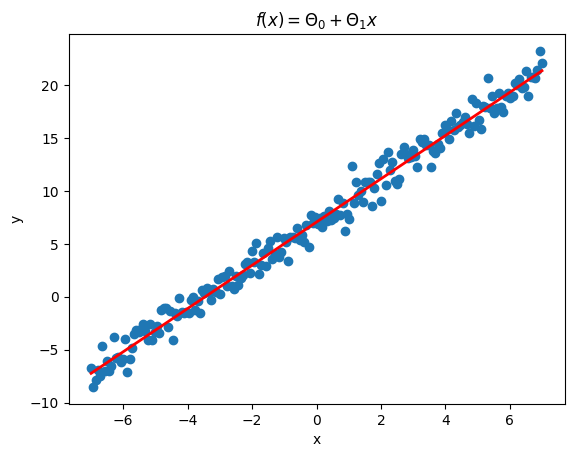

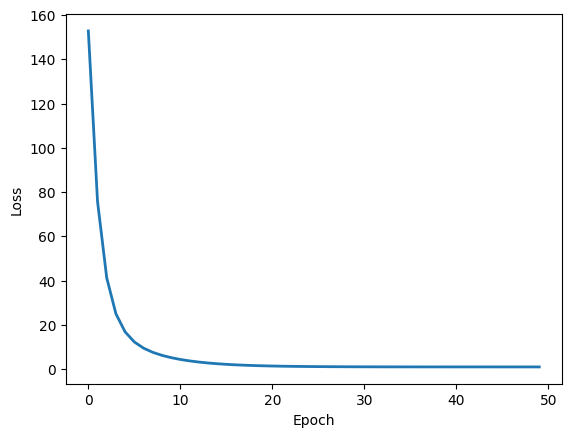

In [ ]:
######################################## 參數設定 ########################################
theat0 = 7
theat1 = 2
epoch = 50
lr = 0.05
N = 200

########################################## 訓練 ##########################################
Simplify_Regression(theat0, theat1, epoch=epoch, lr=lr, N=N)

Play Ground function

In [ ]:
from collections.abc import Iterable

# 對比不同學習率
def PlayGround(theat0, theat1, epoch=20, lr=0.1, N=200):
  w_ls = []
  loss_ls = []
  if isinstance(lr, Iterable):
    for i in lr:
      w, losses = Simplify_Regression(theat0, theat1, epoch, i, N, _return=True)
      w_ls.append(w)
      loss_ls.append(losses)
  else:
    w, losses = Simplify_Regression(theat0, theat1, epoch, lr, N, _return=True)
    w_ls.append(w)
    loss_ls.append(losses)
    lr = [lr]

  for alpha, loss in zip(lr, loss_ls):
    # 檢查梯度是否爆炸
    if np.mean(loss) < 100:
      linear_plot_loss(loss, alpha)

  plt.legend()
  plt.show()

###PlayGround()
 Simplify_Regression(theat0, theat1, epoch=20, lr=0.1, N=200,_return=False)

args:
* theat0 (float)-
 定義回歸線的截距

* theat1 (float)- 回歸線的斜率

* epoch (int)- 訓練的 epoch 數量。默認為 20

* lr (float | tuple)- 學習率。默認為 0.1

* N (int)- 數據樣本的數量。默認為 200

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

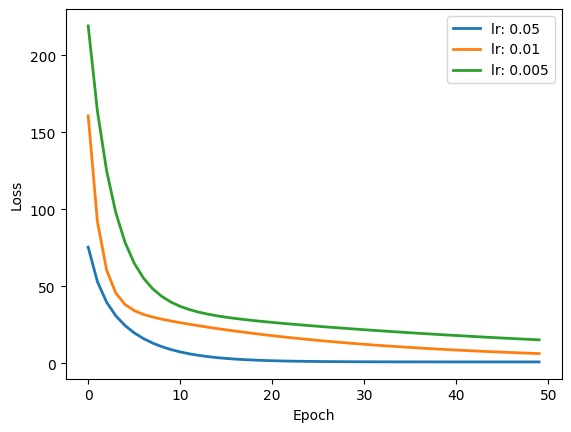

In [ ]:
######################################## 參數設定 ########################################
theat0 = 7
theat1 = 2
epoch = 50
lr = [0.1, 0.05, 0.01, 0.005]
N = 200

######################################## 開始實驗 ########################################
PlayGround(theat0, theat1, epoch=epoch, lr=lr, N=N)

# 建立我們第一個神經網絡




In [ ]:
from torch import nn
from torch.nn import functional as F
from torch import optim

Pytorch大多的隱藏層,激活函數都基於nn.Module

而Module中可以調用其他的Modul Class 進行組合


In [ ]:
class block(nn.Module):
  def __init__(self, input_dim, hidden_dim):
    super(block, self).__init__()
    self.layer = nn.Linear(input_dim, hidden_dim)
    self.act = nn.ReLU()

  def forward(self, x):
    return self.act(self.layer(x))


class main_Module(nn.Module):
  def __init__(self, input_dim, hidden_dim, output_dim):
    super(main_Module, self).__init__()
    self.layer1 = block(input_dim, hidden_dim) #外部Module
    self.layer2 = nn.Linear(hidden_dim, output_dim)

  def forward(self, x):
    x = self.layer1(x)
    x = F.relu(x)
    return self.layer2(x)


######################################## 參數設定 ########################################
N = 64
input_dim = 16
hidden_dim = 32
output_dim = 2
x = torch.randn((N, input_dim))

######################################## 檢查可用性 ########################################
main_Module = main_Module(input_dim, hidden_dim, output_dim)

print(main_Module)
print(main_Module(x).shape)

del block, main_Module, x

main_Module(
  (layer1): block(
    (layer): Linear(in_features=16, out_features=32, bias=True)
    (act): ReLU()
  )
  (layer2): Linear(in_features=32, out_features=2, bias=True)
)
torch.Size([64, 2])


## 使用nn.Module模擬線性回歸

我們嘗試以剛剛學會的nn.Module功能來重現以上部份的內容

樣本生成function

In [ ]:
def Sampler(theat0, theat1):
  X = torch.linspace(-theat0, theat0, steps=N)
  noise = torch.randn(N)

  y = theat0 + theat1 * X + noise
  return X, y

畫圖工具

In [ ]:
def plot_tool(y_line, X, y):
  plt.scatter(X, y)

  plt.plot(X, y_line, color='red', linewidth=2)
  plt.xlabel("x")
  plt.ylabel("y")
  plt.show()

def linear_plot_loss(losses, label=None):
  if label is not None:
    label= f'lr: {label}'
  plt.plot(losses, lw=2, label=label)
  plt.xlabel("Epoch")
  plt.ylabel("Loss")

線性模型

In [ ]:
class nn_Linear_Regression(nn.Module):
  def __init__(self, input_dim=1, output_dim=1):
    super().__init__()
    self.layer = nn.Linear(input_dim, output_dim, bias=True)

  def forward(self, x):
    return self.layer(x)

training function

In [ ]:
def nn_Simplify_Regression(x, y, epoch=20, lr=0.1, N=200, _return=False):
  if x.dim() == 1:
    x = x.view(-1, 1)
  if y.dim() == 1:
    y = y.view(-1, 1)

  qbar = tqdm(range(epoch))
  losses = []
  model = nn_Linear_Regression()
  optimizer = optimization(model.parameters(), lr=lr)
  for i in qbar:
    y_hat = model(x)
    loss = criterion(y_hat, y)
    losses.append(loss.item())
    w = model.state_dict()

    qbar.set_description(f"Epoch: {i+1}, Loss: {round(loss.item(), 3)}, lr: {lr}, w0: {round(w['layer.bias'].item(), 2)}, w1: {round(w['layer.weight'].item(), 2)}")

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  if _return:
    return w, losses
  y_line = model(x.view(-1, 1)).detach().numpy()
  x = x.detach().numpy()
  plot_tool(y_line, X, y)
  linear_plot_loss(losses)

  0%|          | 0/100 [00:00<?, ?it/s]

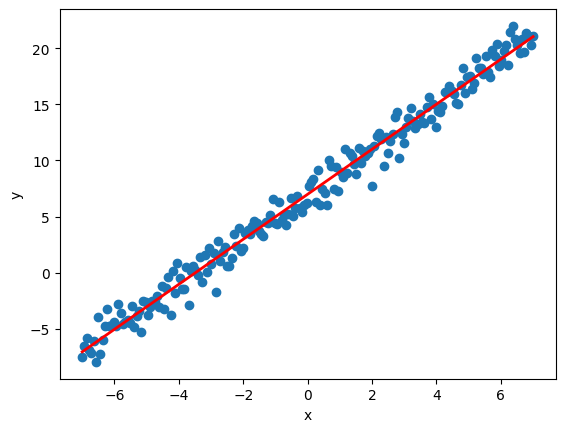

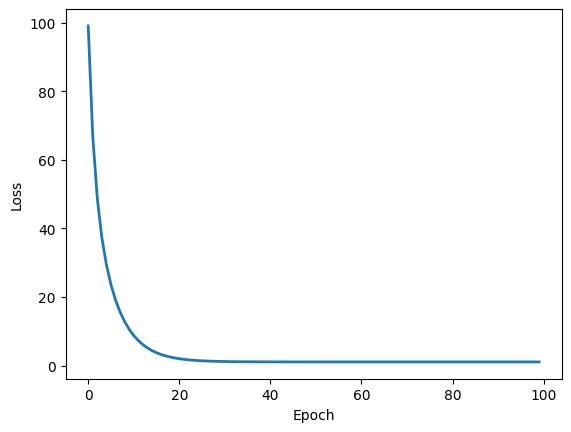

In [ ]:
######################################## 參數設定 ########################################
theat0 = 7
theat1 = 2
epoch = 100
lr = 0.05
N = 200

X, y = Sampler(theat0, theat1)# 生成樣本

optimization = optim.SGD # 定義優化器
criterion = nn.MSELoss() # 定義loss function

########################################## 訓練 ##########################################
nn_Simplify_Regression(X, y, epoch=epoch, lr=lr, N=N)

##課堂練習：二次曲線擬合問題

接下來會給定一個新的樣本生成器: $y=f(x)=2x^2+3+\epsilon$

你的目樣是
**建立一個新的神經網絡**盡可能新似生成器分布

樣本生成器-2

In [ ]:
def Sampler2(theat0, theat1, n):
  x = torch.unsqueeze(torch.linspace(-3, 3, n), dim=1)
  y = theat0*x.pow(2) + theat1 + torch.randn(x.size())
  return x, y

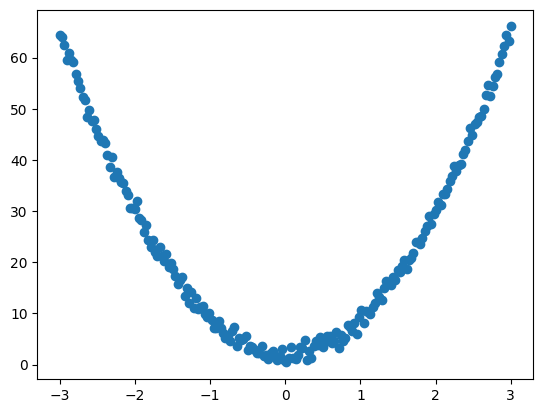

In [ ]:
new_x, new_y = Sampler2(theat0, theat1, N)

plt.scatter(new_x.data.numpy(), new_y.data.numpy())
plt.show()

training function

In [ ]:
def Curve_Trainer(model, x, y, epoch=20, lr=0.05, optimization=optim.SGD, loss=nn.MSELoss, _return=False):
  optimizer = optimization(model.parameters(), lr=lr) #優化器
  criterion = loss() #loss function
  qbar = tqdm(range(epoch))
  losses = []
  for i in qbar:
    y_hat = model(x)
    loss = criterion(y_hat, y)
    losses.append(loss.item())

    qbar.set_description(f"Epoch: {i+1}, Loss: {round(loss.item(), 3)}, lr: {lr}")

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  if _return:
    return losses
  try:
    plot_tool(y_hat.detach().numpy(), x.detach().numpy(), y.detach().numpy())
  except:
    pass
  linear_plot_loss(losses)

#### TODO: 設定你的回歸模型

這部份的練習只需要你建立一個合適的神經網絡模型

In [ ]:
class Quadratic_Regression(nn.Module):
  def __init__(self):
    super().__init__()
    ### TODO: 新增你需要的nn-layer

  def forward(self, x):
    ### TODO: 定義你的forward function

    return x # return output

  0%|          | 0/100 [00:00<?, ?it/s]

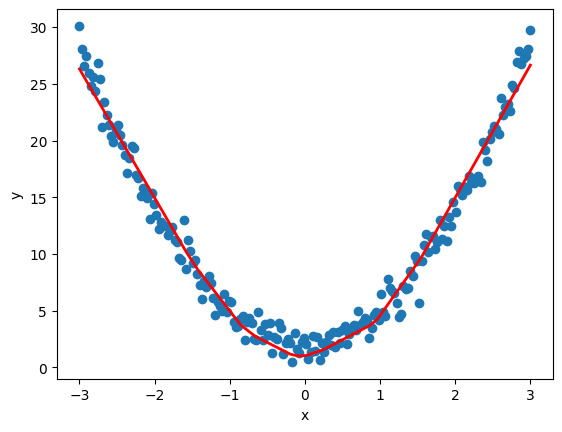

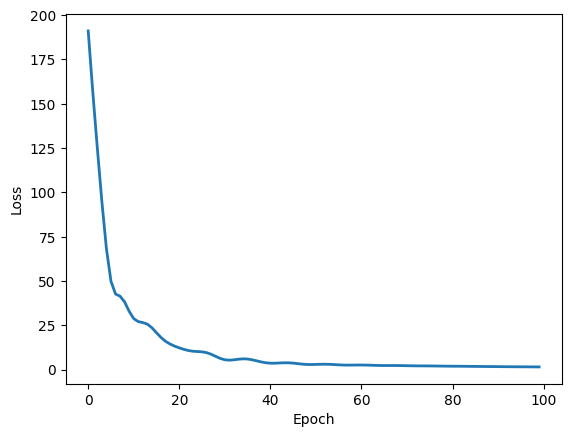

In [ ]:
######################################## 參數設定 ########################################
theat0 = 3
theat1 = 2
epoch = 100
lr = 0.1

new_x, new_y = Sampler2(theat0, theat1, N)

optimization = optim.Adam # 定義優化器
criterion = nn.MSELoss # 定義loss function

########################################## 訓練 ##########################################
_model_ = Quadratic_Regression()
Curve_Trainer(_model_, new_x, new_y, epoch=epoch, lr=lr, optimization=optimization, loss=criterion)

####課堂練習：二元分類任務

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

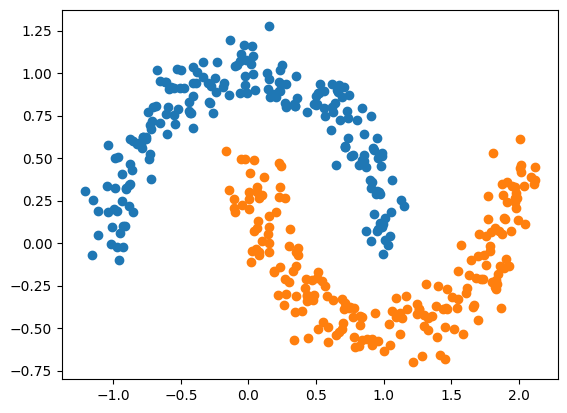

In [ ]:
# 生成資料
X, y = sklearn.datasets.make_moons(400, noise=0.1)
tensor_x, tensor_y = torch.FloatTensor(X), torch.FloatTensor(y).unsqueeze(1)

X_a = X[y==0]
X_b = X[y==1]
plt.scatter(X_a[:,0],X_a[:,1])
plt.scatter(X_b[:,0],X_b[:,1])
plt.show()

tool-funtion

In [ ]:
# Reference: https://medium.com/@prudhvirajnitjsr/simple-classifier-using-pytorch-37fba175c25c
def predict(model, x):
    # Convert into numpy element to tensor
    x = torch.from_numpy(x).type(torch.FloatTensor)
    # Predict and return ans
    ans = model(x)
    return ans.detach().numpy()

def plot_decision_boundary(model, X, y):
    def pred_func(x): return predict(model, x)

    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap="Spectral")
    X_a = X[y == 0]
    X_b = X[y == 1]
    plt.scatter(X_a[:, 0], X_a[:, 1], c="white", s=15)
    plt.scatter(X_b[:, 0], X_b[:, 1], c="c", s=15)
    plt.show()

#### TODO: 設定你的二元分類模型

這部份的練習只需要你建立一個合適的神經網絡模型

因為是任務為二元分類，所以可以嘗試在模型最後面增加Sigmoid層



```
out_act = nn.Sigmod()
```



In [ ]:
class Binary_Classification(nn.Module):
  def __init__(self):
    super().__init__()
    ### TODO: 新增你需要的nn-layer
    self.out_act = nn.Sigmoid()

  def forward(self, x):
    ### TODO: 定義你的forward function

    return self.out_act(x) # return output

  0%|          | 0/100 [00:00<?, ?it/s]

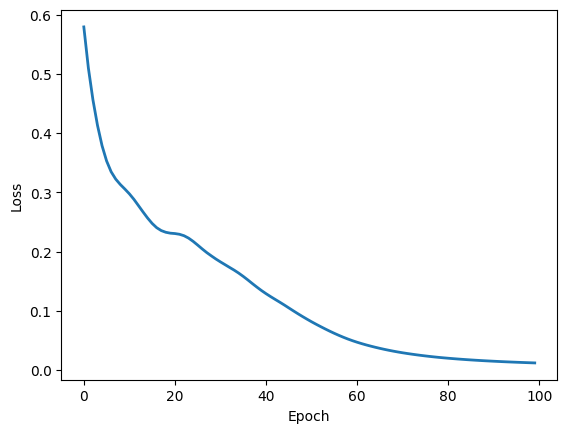

In [ ]:
######################################## 參數設定 ########################################
epoch = 100
lr = 0.05

optimization = optim.Adam # 定義優化器
criterion = nn.BCELoss # 定義loss function

########################################## 訓練 ##########################################
_model_ = Binary_Classification()
Curve_Trainer(_model_, tensor_x, tensor_y, epoch=epoch, lr=lr, optimization=optimization, loss=criterion)

模型決策邊界視覺化

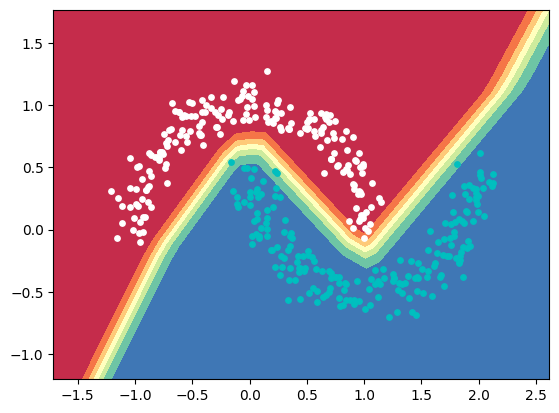

In [ ]:
plot_decision_boundary(_model_, X, y)

#訓練技巧

## 面對"大數據"的技巧: 小批次訓練

在大數據時代中，我們經常需要處理大規模的資料集(例如是GPT訓練時使用到幾十TB的資料集)

因此，直接使用梯度訓練模型在大多時候是不現實的

因此，小批次訓練作為代替方法，他的原理是把資料集分割成一組組，並分批次進行計算梯度

在Pytorch中進行mini-batch訓練：

* 把資料整合為Dataset

* 建立DataLoader後，把Dataset放入並指定batch大小


In [ ]:
import torchvision
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets, transforms

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

import time
import warnings
warnings.filterwarnings("ignore")

### mini-batch訓練—以MNIST為例

In [ ]:
# 獲取訓練集dataset
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,)),]
)
train_data = torchvision.datasets.MNIST(
             root='./mnist/', # dataset儲存路徑
             train=True, # True表示是train訓練集，False表示test測試集
             transform=transform, # 將原資料規範化到（0,1）區間
             download=True,
             )
test_data = torchvision.datasets.MNIST(
             root='./mnist/', # dataset儲存路徑
             train=False, # True表示是train訓練集，False表示test測試集
             transform=transform, # 將原資料規範化到（0,1）區間
             download=True,
             )

train_x, train_y = train_data.data, train_data.targets
test_x, test_y = test_data.data, test_data.targets
print("Training size:",train_x.shape)
print("Testing size:",test_x.shape)

Training size: torch.Size([60000, 28, 28])
Testing size: torch.Size([10000, 28, 28])


MNIST可視化

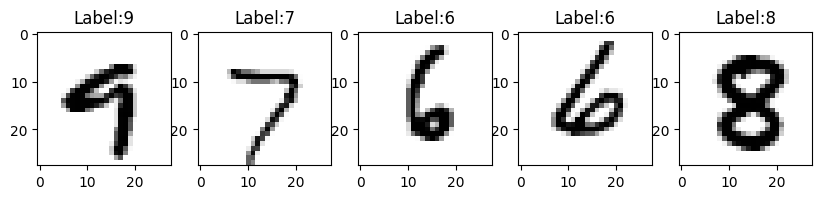

In [ ]:
samples = np.random.randint(0, train_data.data.size(0),size=5)
plt.figure(figsize=(10,7))
for i in range(1,6):
  plt.subplot(int(f"15{i}"))
  plt.imshow(train_data.data[samples[i-1]].numpy(),cmap="binary")
  plt.title(f"Label:{train_data.targets[samples[i-1]]}")

### TensorDataset()

我們能以TensorDataset把多個Tensor整合為一個Dataset Object

細節可以查閱: [Datasets & DataLoaders](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)

In [ ]:
train_dataset = TensorDataset(train_data.data, train_data.targets)
test_dataset = TensorDataset(test_data.data, test_data.targets)

### DataLoader()

DataLoader(dataset, batch_size=1, shuffle=False, sampler=Nonebatch_sampler=None, num_workers=0, collate_fn=Nonepin_memory=False, drop_last=False,timeout=0worker_init_fn=None, *, prefetch_factor=2persistent_workers=False)

args:
* dataset (Dataset)- 訓練需要處理的資料集

* batch_size (int)- batch大小

* shuffle (bool)- 定義資料是否需要亂序

* num_workers (int)- 指定Loader可使用的線程數量


In [ ]:
train_loader = DataLoader(train_dataset,
              batch_size=64,
              shuffle=False,
              num_workers=4)

test_loader = DataLoader(test_dataset,
              batch_size=64,
              shuffle=False,
              num_workers=0)

for image, label in train_loader:
  print(image.shape)
  print(label.shape)
  break

torch.Size([64, 28, 28])
torch.Size([64])


## 實驗準備

### nn.Sequential()

除了class object的模型建立方法外，這function能把輸入的Module按順序建立一個整合Module

下面兩種方法在模型架構上是等效的



In [ ]:
model_Sequential = nn.Sequential(
          nn.Linear(28*28, 128), #layer-1
          nn.LeakyReLU(negative_slope=0.02),
          nn.Linear(128, 32), #layer-2
          nn.LeakyReLU(negative_slope=0.02),
          nn.Linear(32, 10)) #layer-3

class model_Module(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(28*28, 128)
    self.fc2 = nn.Linear(128, 32)
    self.fc3 = nn.Linear(32, 10)
    self.act = nn.LeakyReLU(negative_slope=0.02)

  def forward(self, x):
    x = self.act(self.fc1(x)) #layer-1
    x = self.act(self.fc2(x)) ##layer-2
    return self.fc3(x) ##layer-3

image, label = next(iter(train_loader))

model_class = model_Module()
print(model_Sequential(image.view(-1,28*28).float()).shape)
print(model_class(image.view(-1,28*28).float()).shape)

torch.Size([64, 10])
torch.Size([64, 10])


tool function

In [ ]:
def plot_loss(train_loss, eval_loss):
  plt.plot([i[0] for i in train_loss], [i[1] for i in train_loss], label="train_loss")
  plt.plot([i[0] for i in eval_loss], [i[1] for i in eval_loss], label="eval_loss")
  plt.legend()
  plt.show()

def weight_reset(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
      m.reset_parameters()

training function

In [ ]:
def check_vram():
  return torch.cuda.memory_allocated() if torch.cuda.is_available() else 0

def MNIST_trainer(model, optimizer, loss_func, train_loader, test_loader,
          epoch=5,
          vail_each=1,
          updata_batch=None,
          cnn=False,
          plot=False,
          early_stop=torch.inf,
          init=True,
          amp=False,
          device=None):
  if init:
    model.apply(weight_reset) # 參數初始化

  if device is None:
    device = "cuda" if torch.cuda.is_available() else "cpu" # 當環境支持gpu時使用gpu進行訓練
  print(f"Device: {device}\namp: {amp}")

  if updata_batch is None:
    updata_batch = len(test_loader) // 5

  model = model.to(device)
  train_loss = []
  test_loss = []
  best_epoch = 0
  patience = 0
  best_loss = np.inf


  start_time = time.monotonic()
  # 開始訓練
  for epoch_idx in range(epoch):
    model.train()
    qbar = tqdm(train_loader, total= len(train_loader))
    train_loss_sum = 0
    train_acc_sum = 0
    train_item_sum = 0
    use_vram = 0
    # 訓練階段
    for batch_idx, (image, label) in enumerate(qbar):
      image = image.float().to(device)

      if cnn:
        image = image.view(-1,1,28,28)
      else:
        image = image.view(-1,28*28)

      label = label.to(device)

      #自動混合精度
      with torch.autocast(device_type=device, enabled=amp):
        # 向前傳播
        output = model(image)

        # 計算loss
        loss = loss_func(output, label)

      # 計算單一epoch的平均loss
      train_loss_sum += loss.item()
      train_loss_avg = train_loss_sum / (batch_idx+1)

      # 計算vram
      use_vram += check_vram()
      use_vram_avg = use_vram / (batch_idx+1)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      # 計算準確率
      if batch_idx % updata_batch == 0:
        pred_y = torch.max(output,1)[1].data.squeeze()
        train_acc_sum += sum(pred_y==label)
        train_item_sum += float(label.size(0))
        accuracy = train_acc_sum / train_item_sum
        description = f"[Training - {epoch_idx+1}/{epoch}] Loss:{train_loss_avg:.3f}, Accuracy:{accuracy:.3f}"
        qbar.set_description(description + f", Vram: {use_vram_avg/(1024**(2)):.1f}MiB" if torch.cuda.is_available() else "")
    train_loss.append([epoch_idx, train_loss_avg])

    # 測試階段
    if epoch_idx % vail_each == 0 or epoch_idx == epoch-1:
      model.eval()
      with torch.no_grad():
        test_loss_sum = 0
        test_acc_sum = 0
        test_item_sum = 0
        use_vram = 0
        qbar = tqdm(test_loader, total= len(test_loader))
        for batch_idx, (image, label) in enumerate(qbar):
          image = image.float().to(device)
          if cnn:
            image = image.view(-1,1,28,28)
          else:
            image = image.view(-1,28*28)

          label = label.to(device)

          #自動混合精度
          with torch.autocast(device_type=device, enabled=amp):
            # 向前傳播
            output = model(image)

            # 計算loss
            loss = loss_func(output, label)

          # 計算vram
          use_vram += check_vram()
          use_vram_avg = use_vram / (batch_idx+1)

          # 計算單一epoch的平均loss
          test_loss_sum += loss.item()
          test_loss_avg = test_loss_sum / (batch_idx+1)

          # 計算準確率
          if batch_idx % updata_batch == 0:
            pred_y = torch.max(output,1)[1].data.squeeze()
            test_acc_sum += sum(pred_y==label)
            test_item_sum += float(label.size(0))
            accuracy = test_acc_sum / test_item_sum
            description = f"[Validation - {epoch_idx+1}/{epoch}] Loss:{test_loss_avg:.3f}, Accuracy:{accuracy:.2f}"
            qbar.set_description(description + f", Vram: {use_vram_avg/(1024**(2)):.1f}MiB" if torch.cuda.is_available() else "")
      test_loss.append([epoch_idx, test_loss_avg])

      # 檢查loss和更新最佳loss
      if best_loss > test_loss_avg:
        best_epoch = epoch_idx+1
        best_loss = test_loss_avg
        best_acc = accuracy
        patience = 0
      else:
        patience += 1
        # 當連續某次loss沒有進步,中斷訓練
        if patience > early_stop:
          break

  end_time = time.monotonic()
  # 計算訓練時間
  elapsed_time = (end_time-start_time) / 60
  if plot:
    # loss過程可視化
    plot_loss(train_loss, test_loss)

  print(f"Training Done!\nbest epoch-{best_epoch}/{epoch}:\nbest_Loss:{best_loss:.4f}, best_Accuracy:{best_acc:.3f}\ntime used - {elapsed_time:.2f}mins")

  #回傳訓練好的模型
  return model

### MNIST_trainer()

MNIST_trainer(model, optimizer, loss_func,train_loader, test_loader,
  epoch=5,
  amp=False,
  vail_each=1,
  updata_batch=None,
  cnn=False,
  plot=False,early_stop=torch.inf,
          init=True,
          
  device=None):

---


  

  自定義function用於後續的統一實驗

args:
  * model(nn.Module)- 進行訓練的模型

* optimizer(optim.Optimizer)- 使用的優化器

* loss_func(nn.modules.loss)- 使用的loss function
* train_loader (DataLoader)- 訓練集DataLoader

* test_loader (DataLoader)- 試驗集DataLoader

* epoch(int)- 定義需要訓練epoch數量

* amp(bool)- 定義是否混合精度功能

* vail_eaph(int)- 定指每多少個epoch進行一次試驗集測試

* cnn(bool)- 說明訓練模型輸入是否為Conv2d

* early_stop(int)- 定義early stop機制的耐性門檻

return:

* model(nn.Module)- 訓練後的模型






API範例

In [ ]:
_mode_ = nn.Sequential(
          nn.Linear(28*28, 64),
          nn.LeakyReLU(negative_slope=0.02),
          nn.Linear(64, 16),
          nn.LeakyReLU(negative_slope=0.02),
          nn.Linear(16, 10)) #pytorch 模型

optimizer = optim.Adam(_mode_.parameters(), lr=0.001) #優化器
loss_func = nn.CrossEntropyLoss()  #loss function

exmaple_model = MNIST_trainer(_mode_, optimizer, loss_func, train_loader, test_loader, epoch=5)

Device: cuda
amp: False


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Training Done!
best epoch-5/5:
best_Loss:0.1555, best_Accuracy:0.961
time used - 0.45mins


## 避免Overfitting的方法

Overfitting是指把訓練集表現良好,在把非訓練集資料泛化較果的情況

接下來會介紹一些緩解過度擬合的簡單方法:

* Dropout

* L1/L2正規化

* early stop

###Dropout
Dropout 是指訓練時會隨機關閉部份神經元，令每次訓練只有部份的神經元得到更新。

注意：

 * Dropout的p過高會令模型的表達力嚴重下降

 pytorch在模型加入Dropout層實現


```
Dropout_layer = nn.Dropout(p=0.5)
```



regular_model 是正常的模型

dropout_model是加入了dropout機制的模型

In [ ]:
###################################### 統一參數 ######################################
epoch = 10
lr = 0.001

######################################## 模型 ########################################

# 正常模型
regular_model = nn.Sequential(
          nn.Linear(28*28, 512),
          nn.LeakyReLU(negative_slope=0.02),
          nn.Linear(512,256),
          nn.LeakyReLU(negative_slope=0.02),
          nn.Linear(256,10))
# dropout模型
dropout_model = nn.Sequential(
          nn.Linear(28*28, 512),
          nn.LeakyReLU(negative_slope=0.02),
          nn.Dropout(0.3), #Dropout-layer
          nn.Linear(512,256),
          nn.LeakyReLU(negative_slope=0.02),
          nn.Dropout(0.3), #Dropout-layer
          nn.Linear(256,10))

Device: cuda
amp: False


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

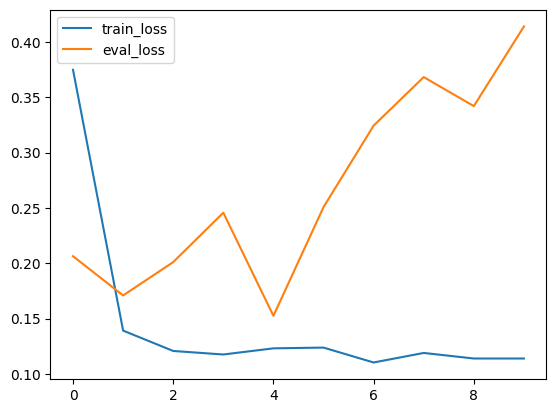

Training Done!
best epoch-5/10:
best_Loss:0.1526, best_Accuracy:0.971
time used - 0.83mins


In [ ]:
###################################### 正常模型訓練 ######################################
_model_ = regular_model
optimizer = optim.Adam(_model_.parameters(), lr=lr)
loss_func = nn.CrossEntropyLoss()

train_regular_model = MNIST_trainer(_model_, optimizer, loss_func, train_loader, test_loader, epoch=epoch, plot=True)

Device: cuda
amp: False


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

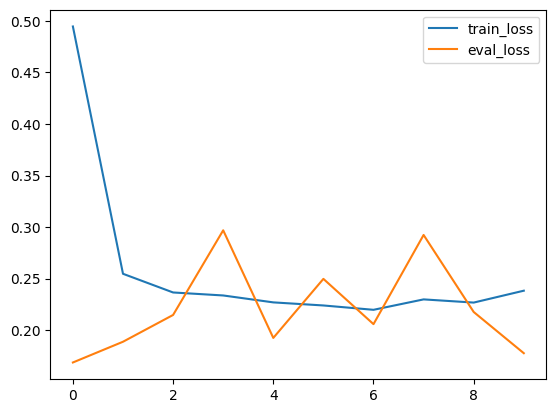

Training Done!
best epoch-1/10:
best_Loss:0.1686, best_Accuracy:0.943
time used - 0.88mins


In [ ]:
###################################### Dropout模型訓練 ######################################
_model_ = dropout_model
optimizer = optim.Adam(_model_.parameters(), lr=lr)
loss_func = nn.CrossEntropyLoss()

train_dropout_model = MNIST_trainer(_model_, optimizer, loss_func, train_loader, test_loader, epoch=epoch, plot=True)

### L2 regularization
對模型參數進行正規化:

* 避免某個參數主導模型

* 避免overfitting訓練資料中的細節/噪音

pytoch主要在基於優化器實現



```
optimizer = optim.SGD(_model_.parameters(), weight_decay=0.0001)
```



Device: cuda
amp: False


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

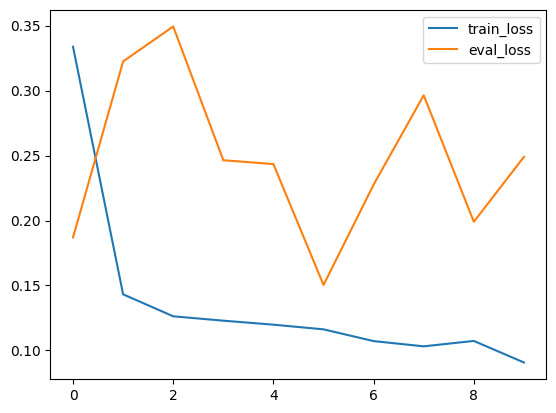

Training Done!
best epoch-6/10:
best_Loss:0.1504, best_Accuracy:0.969
time used - 0.82mins


In [ ]:
###################################### L2正規化訓練 ######################################
_model_ = regular_model
optimizer = optim.Adam(_model_.parameters(), lr=lr, weight_decay=0.0001) #參數L2正規化
loss_func = nn.CrossEntropyLoss()

train_l2_model = MNIST_trainer(_model_, optimizer, loss_func, train_loader, test_loader, epoch=epoch, plot=True)

### early stop

當模型訓練收斂時中斷訓練

* 避免過度擬合
* 避免訓練時間過長

Device: cuda
amp: False


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

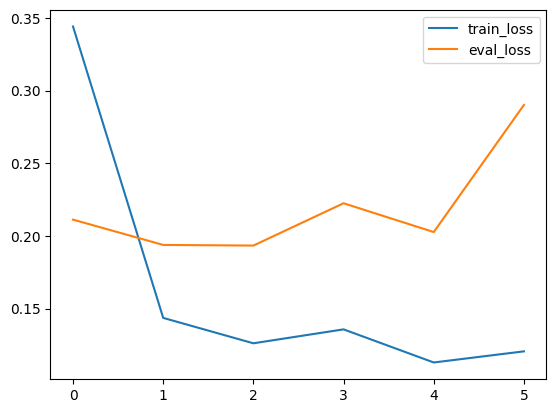

Training Done!
best epoch-3/10:
best_Loss:0.1934, best_Accuracy:0.951
time used - 0.49mins


In [ ]:
###################################### early stop訓練 ######################################
_model_ = regular_model
optimizer = optim.Adam(_model_.parameters(), lr=lr)
loss_func = nn.CrossEntropyLoss()

train_l2_model = MNIST_trainer(_model_, optimizer, loss_func, train_loader, test_loader, epoch=epoch, early_stop=2, plot=True)

###批量歸一化

增強模型面對參數在劇烈變化時的穩定性

增快/增強模型的訓練效果

---
API


```
bn_layer = nn.BatchNorm1d(num_features=1)
```




在下面的範例中，將了解批量歸一化如何減少初始化的影響。



In [ ]:
import torch
from torch import nn
from torch.nn import init
import torch.nn.functional as F
import torch.optim as optim


import torch.utils.data as Data
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm

tool function

In [ ]:
def sampler(theat0, theat1, avg=0, std=1, arange=3, n_sample=1000):
  if  isinstance(arange, (int, float)):
    arange = [-arange, arange]
  x = torch.unsqueeze(torch.linspace(arange[0], arange[1], n_sample), dim=1)
  nose = torch.normal(avg, std, x.size())
  y = theat0 * x.pow(2) + theat1 + nose
  return x.type(torch.float32), y.type(torch.float32)

def plot_tool(y_line, X, y):
  plt.scatter(X, y)

  plt.plot(X, y_line, color='red', linewidth=2)

  #plt.title(r"$f(x)={\Theta_0}+{\Theta_1}x$")
  plt.xlabel("x")
  plt.ylabel("y")
  plt.show()

def plot_loss(losses, label=None):
  if label is not None:
    label= f'lr: {label}'
  plt.plot(losses, lw=2, label=label)
  plt.xlabel("Epoch")
  plt.ylabel("Loss")

training function

In [ ]:
def Trainer(model, train_loader, test_loader, epoch=20, optimization=optim.SGD, loss_func=nn.MSELoss, _return=False):
  losses = []
  for i in range(epoch):
    qbar = tqdm(train_loader)
    for idx, (x, y) in enumerate(qbar):
      pred = model(x)
      loss = loss_func(pred, y)
      losses.append(loss.item())
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      qbar.set_description(f"Epoch: {i+1}, Loss: {round(loss.item(), 3)}")

  if _return:
    return losses
  plot_loss(losses)
  return model

生成資料

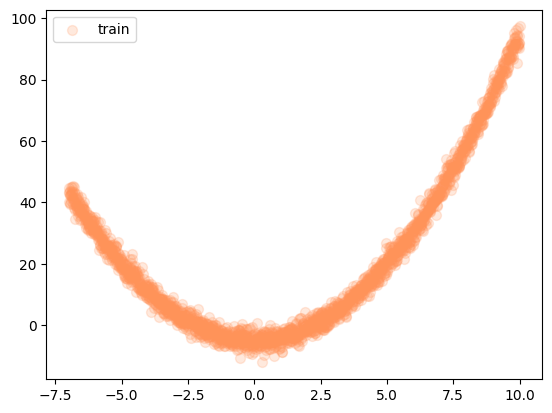

In [ ]:
theat0=1
theat1=-5
avg=0
std=2
arange=[-7, 10]
n_sample=2000

train_x, train_y = sampler(theat0, theat1, avg, std, arange, n_sample)
test_x, test_y = sampler(theat0, theat1, avg, std, arange, n_sample)

batch_size = 64

train_dataset = Data.TensorDataset(train_x, train_y)
train_loader = Data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)

test_dataset = Data.TensorDataset(test_x, test_y)
test_loader = Data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False, num_workers=0)

plt.scatter(train_x.numpy(), train_y.numpy(), c='#FF9359', s=50, alpha=0.2, label='train')
plt.legend(loc='upper left')
plt.show()

####定義模型

Network(use_bn)

args:
* use_bn(bool)- 定義是否進行批次歸一化

In [ ]:
class Dense(nn.Module):
  def __init__(self, in_channel, out_channel, use_bn=True):
    super(Dense, self).__init__()
    self.layer = nn.Linear(in_channel, out_channel)
    self.act = nn.ReLU()
    self.bn = nn.BatchNorm1d(out_channel) #
    self.use_bn = use_bn

  def forward(self,x):
    if self.use_bn:
      return self.act(self.bn(self.layer(x)))
    else:
      return self.act(self.layer(x))

class Network(nn.Module):
  def __init__(self,use_bn=True):
    super(Network, self).__init__()
    self.use_bn = use_bn
    self.input_layer = nn.Linear(1,10)
    self.input_bn = nn.BatchNorm1d(10)
    self.act = nn.ReLU()
    self.hiddens = nn.ModuleList([Dense(10,10,self.use_bn) for _ in range(5)])
    self.output_layer = nn.Linear(10,1)

  def forward(self,x):
    if self.use_bn:
      hidden = self.act(self.input_bn(self.input_layer(x)))
    else:
      hidden = self.act(self.input_layer(x))
    for i in range(5):
      hidden = self.hiddens[i](hidden)
    out = self.output_layer(hidden)
    return out

####實驗開始

我們實驗中都把模型部份參數初始到一個很差的值，模型參數需要進行大幅度變動才能到理想水平

In [ ]:
def weights_init(m):
    if isinstance(m, nn.Linear):
        m.bias.data = torch.FloatTensor([-0.2])

正常模型

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

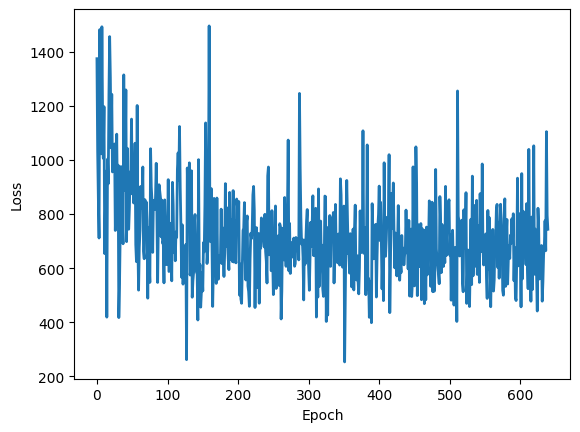

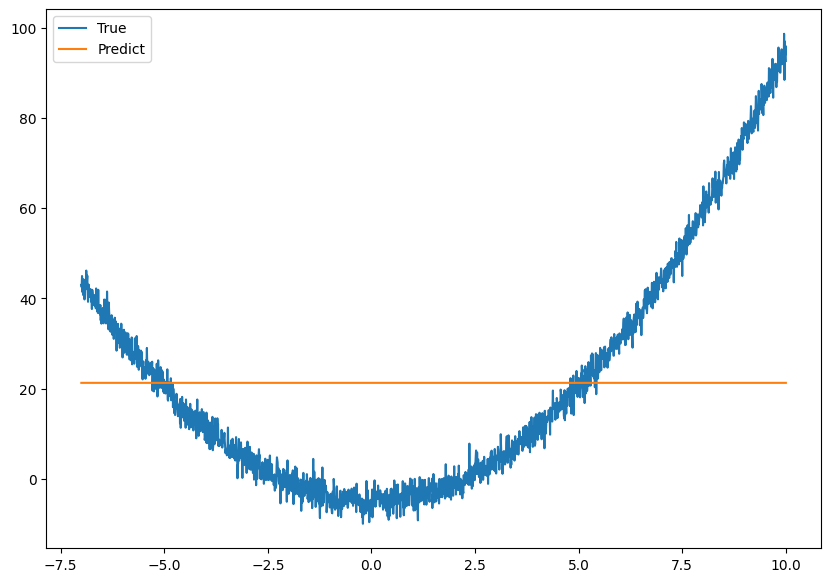

In [ ]:
_model_ = Network(use_bn=False)
_model_.apply(weights_init)
optimizer = optim.SGD(_model_.parameters(), lr=0.005)
loss_func = nn.MSELoss()

train_Quadratic_Regression = Trainer(_model_, train_loader, test_loader, 20, optimizer, loss_func)

y_pred = train_Quadratic_Regression(test_x).detach().numpy().flatten()
plt.figure(figsize=(10,7))
plt.plot(test_x.numpy(), test_y.numpy(), label="True")
plt.plot(test_x.numpy(), y_pred, label="Predict")
plt.legend()
plt.show()

加入Batch Normalization

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

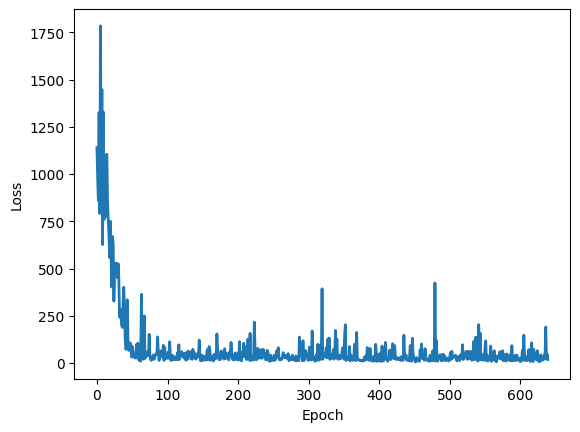

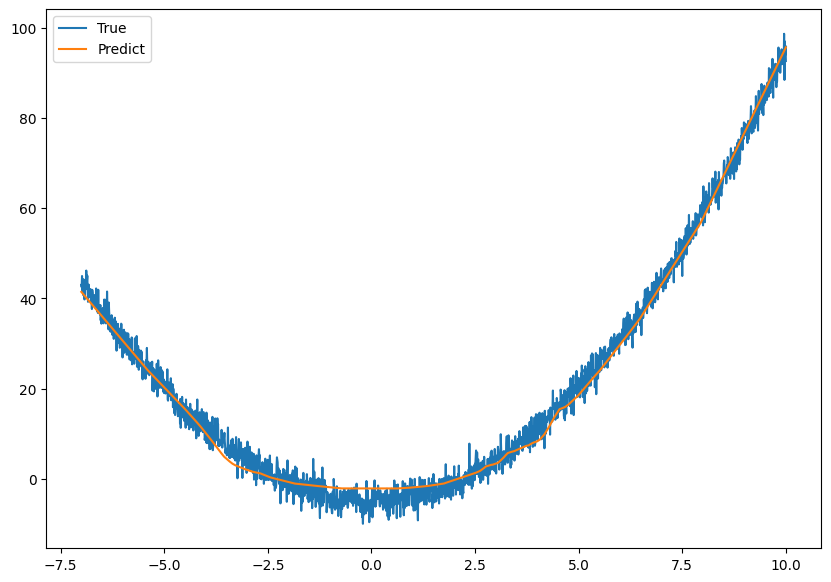

In [ ]:
###################################### BN模型訓練 ######################################
_model_ = Network(use_bn=True)
_model_.apply(weights_init)
optimizer = optim.SGD(_model_.parameters(), lr=0.001)
loss_func = nn.MSELoss()

train_Quadratic_Regression = Trainer(_model_, train_loader, test_loader, 20, optimizer, loss_func)
y_pred = train_Quadratic_Regression(test_x).detach().numpy().flatten()
plt.figure(figsize=(10,7))
plt.plot(test_x.numpy(), test_y.numpy(), label="True")
plt.plot(test_x.numpy(), y_pred, label="Predict")
plt.legend()
plt.show()

## 使用CNN模型進行影像分類

接下來使用2層CNN來進行影像分類
常見的CNN架構如下:
* CNN-layer
* Pooling-layer
* Fully-connected-layer

而且會對比批量歸一化對CNN模型的效果

In [ ]:
import torchvision
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets, transforms

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

import time
import warnings
warnings.filterwarnings("ignore")

###資料集準備

In [ ]:
def MNIST_dataset():
  transform = transforms.Compose([transforms.ToTensor(),
                 transforms.Normalize((0.5,), (0.5,))
                 ])

  train_data = torchvision.datasets.MNIST(
             root='', # dataset儲存路徑
             train=True, # True表示是train訓練集，False表示test測試集
             transform=transform, # 將原資料規範化到（0,1）區間
             download=True,
             )
  test_data = torchvision.datasets.MNIST(
              root='./mnist/', # dataset儲存路徑
              train=False, # True表示是train訓練集，False表示test測試集
              transform=transform, # 將原資料規範化到（0,1）區間
              download=True,
              )

  return train_data, test_data

train_data, test_data = MNIST_dataset()
train_dataset = TensorDataset(train_data.data, train_data.targets)
test_dataset = TensorDataset(test_data.data, test_data.targets)

train_loader = DataLoader(train_dataset,
              batch_size=64,
              shuffle=True,
              num_workers=4)

test_loader = DataLoader(test_dataset,
              batch_size=64,
              shuffle=False,
              num_workers=0)

tool function

In [ ]:
def plot_loss(train_loss, eval_loss):
  plt.plot([i[0] for i in train_loss], [i[1] for i in train_loss], label="train_loss")
  plt.plot([i[0] for i in eval_loss], [i[1] for i in eval_loss], label="eval_loss")
  plt.legend()
  plt.show()

def weight_reset(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
      m.reset_parameters()

training function

In [ ]:
def check_vram():
  return torch.cuda.memory_allocated() if torch.cuda.is_available() else 0

def MNIST_trainer(model, optimizer, loss_func, train_loader, test_loader,
          epoch=5,
          vail_each=1,
          updata_batch=None,
          cnn=False,
          plot=False,
          early_stop=torch.inf,
          init=True,
          amp=False,
          device=None):
  if init:
    model.apply(weight_reset) # 參數初始化

  if device is None:
    device = "cuda" if torch.cuda.is_available() else "cpu" # 當環境支持gpu時使用gpu進行訓練
  print(f"Device: {device}\namp: {amp}")

  if updata_batch is None:
    updata_batch = len(test_loader) // 5

  model = model.to(device)
  train_loss = []
  test_loss = []
  best_epoch = 0
  patience = 0
  best_loss = np.inf


  start_time = time.monotonic()
  # 開始訓練
  for epoch_idx in range(epoch):
    model.train()
    qbar = tqdm(train_loader, total= len(train_loader))
    train_loss_sum = 0
    train_acc_sum = 0
    train_item_sum = 0
    use_vram = 0
    # 訓練階段
    for batch_idx, (image, label) in enumerate(qbar):
      image = image.float().to(device)

      if cnn:
        image = image.view(-1,1,28,28)
      else:
        image = image.view(-1,28*28)

      label = label.to(device)

      #自動混合精度
      with torch.autocast(device_type=device, enabled=amp):
        # 向前傳播
        output = model(image)

        # 計算loss
        loss = loss_func(output, label)

      # 計算單一epoch的平均loss
      train_loss_sum += loss.item()
      train_loss_avg = train_loss_sum / (batch_idx+1)

      # 計算vram
      use_vram += check_vram()
      use_vram_avg = use_vram / (batch_idx+1)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      # 計算準確率
      if batch_idx % updata_batch == 0:
        pred_y = torch.max(output,1)[1].data.squeeze()
        train_acc_sum += sum(pred_y==label)
        train_item_sum += float(label.size(0))
        accuracy = train_acc_sum / train_item_sum
        description = f"[Training - {epoch_idx+1}/{epoch}] Loss:{train_loss_avg:.3f}, Accuracy:{accuracy:.3f}"
        qbar.set_description(description + f", Vram: {use_vram_avg/(1024**(2)):.1f}MiB" if torch.cuda.is_available() else "")
    train_loss.append([epoch_idx, train_loss_avg])

    # 測試階段
    if epoch_idx % vail_each == 0 or epoch_idx == epoch-1:
      model.eval()
      with torch.no_grad():
        test_loss_sum = 0
        test_acc_sum = 0
        test_item_sum = 0
        use_vram = 0
        qbar = tqdm(test_loader, total= len(test_loader))
        for batch_idx, (image, label) in enumerate(qbar):
          image = image.float().to(device)
          if cnn:
            image = image.view(-1,1,28,28)
          else:
            image = image.view(-1,28*28)

          label = label.to(device)

          #自動混合精度
          with torch.autocast(device_type=device, enabled=amp):
            # 向前傳播
            output = model(image)

            # 計算loss
            loss = loss_func(output, label)

          # 計算vram
          use_vram += check_vram()
          use_vram_avg = use_vram / (batch_idx+1)

          # 計算單一epoch的平均loss
          test_loss_sum += loss.item()
          test_loss_avg = test_loss_sum / (batch_idx+1)

          # 計算準確率
          if batch_idx % updata_batch == 0:
            pred_y = torch.max(output,1)[1].data.squeeze()
            test_acc_sum += sum(pred_y==label)
            test_item_sum += float(label.size(0))
            accuracy = test_acc_sum / test_item_sum
            description = f"[Validation - {epoch_idx+1}/{epoch}] Loss:{test_loss_avg:.3f}, Accuracy:{accuracy:.2f}"
            qbar.set_description(description + f", Vram: {use_vram_avg/(1024**(2)):.1f}MiB" if torch.cuda.is_available() else "")
      test_loss.append([epoch_idx, test_loss_avg])

      # 檢查loss和更新最佳loss
      if best_loss > test_loss_avg:
        best_epoch = epoch_idx+1
        best_loss = test_loss_avg
        best_acc = accuracy
        patience = 0
      else:
        patience += 1
        # 當連續某次loss沒有進步,中斷訓練
        if patience > early_stop:
          break

  end_time = time.monotonic()
  # 計算訓練時間
  elapsed_time = (end_time-start_time) / 60
  if plot:
    # loss過程可視化
    plot_loss(train_loss, test_loss)

  print(f"Training Done!\nbest epoch-{best_epoch}/{epoch}:\nbest_Loss:{best_loss:.4f}, best_Accuracy:{best_acc:.3f}\ntime used - {elapsed_time:.2f}mins")

  #回傳訓練好的模型
  return model

### MNIST_trainer()

MNIST_trainer(model, optimizer, loss_func,train_loader, test_loader, epoch=5, amp=False, vail_each=1, updata_batch=None, cnn=False, plot=False,early_stop=torch.inf, init=True,

device=None):

自定義function用於後續的統一實驗

args:

model(nn.Module)- 進行訓練的模型
optimizer(optim.Optimizer)- 使用的優化器

loss_func(nn.modules.loss)- 使用的loss function

train_loader (DataLoader)- 訓練集DataLoader

test_loader (DataLoader)- 試驗集DataLoader

epoch(int)- 定義需要訓練epoch數量

amp(bool)- 定義是否混合精度功能

vail_eaph(int)- 定指每多少個epoch進行一次試驗集測試

cnn(bool)- 說明訓練模型輸入是否為Conv2d

early_stop(int)- 定義early stop機制的耐性門檻

return:

model(nn.Module)- 訓練後的模型

2層CNN模型

In [ ]:
class CNN_Module(nn.Module):
    def __init__(self):
        super().__init__()
        self.activation = nn.ReLU()
        # shape: (1,28,28) -> (16,24,24)
        self.cnn1 = nn.Conv2d(
            in_channels=1, # binary image
            out_channels= 16, # 16 filters
            kernel_size=5,
            padding=0, # no padding
            stride=1,
        )
        # shape: (16,24,24) -> (16,12,12)
        self.pooling1 = nn.MaxPool2d(kernel_size=2)
        # shape: (16,12,12) -> (32,8,8)
        self.cnn2 = nn.Conv2d(
            in_channels=16,
            out_channels=32,
            kernel_size=5,
        )
        # shape: (16,12,12) -> (32,4,4)
        self.pooling2 = nn.MaxPool2d(kernel_size=2)
        self.output_layer = nn.Linear(32*4*4, 10)

    def forward(self,x):
        # Conv Block 1
        hidden_1 = self.cnn1(x)
        activation_1 = self.activation(hidden_1)
        pool_1 = self.pooling1(activation_1)

        # Conv Block 2
        hidden_2 = self.cnn2(pool_1)
        activation_2 = self.activation(hidden_2)
        pool_2 = self.pooling2(activation_2)

        # Output
        flatten = pool_2.view(pool_2.size(0), -1)
        out = self.output_layer(flatten)

        return out

In [ ]:
###################################### CNN模型訓練 ######################################
_model_ = CNN_Module()
optimizer = optim.Adam(_model_.parameters(), lr=0.005)
loss_func = nn.CrossEntropyLoss()

CNN_model = MNIST_trainer(_model_, optimizer, loss_func, train_loader, test_loader, cnn=True, epoch=5)

Device: cuda
amp: False


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Training Done!
best epoch-1/5:
best_Loss:0.1129, best_Accuracy:0.966
time used - 0.48mins


加入批次歸一化

In [ ]:
class bn_CNN_Module(nn.Module):
    def __init__(self):
        super().__init__()
        self.activation = nn.ReLU()
        # shape: (1,28,28) -> (16,24,24)
        self.cnn1 = nn.Conv2d(
            in_channels=1, # binary image
            out_channels= 16, # 16 filters
            kernel_size=5,
            padding=0, # no padding
            stride=1,
        )
        self.conv1_bn = nn.BatchNorm2d(16) #歸一化
        # shape: (16,24,24) -> (16,12,12)
        self.pooling1 = nn.MaxPool2d(kernel_size=2)
        # shape: (16,12,12) -> (32,8,8)
        self.cnn2 = nn.Conv2d(
            in_channels=16,
            out_channels=32,
            kernel_size=5,
        )
        self.conv2_bn = nn.BatchNorm2d(32) #歸一化
        # shape: (16,12,12) -> (32,4,4)
        self.pooling2 = nn.MaxPool2d(kernel_size=2)
        self.output_layer = nn.Linear(32*4*4, 10)

    def forward(self,x):
        # Conv Block 1
        hidden_1 = self.cnn1(x)
        hidden_1 = self.conv1_bn(hidden_1)
        activation_1 = self.activation(hidden_1)
        pool_1 = self.pooling1(activation_1)

        # Conv Block 2
        hidden_2 = self.cnn2(pool_1)
        hidden_2 = self.conv2_bn(hidden_2)
        activation_2 = self.activation(hidden_2)
        pool_2 = self.pooling2(activation_2)

        # Output
        flatten = pool_2.view(pool_2.size(0), -1)
        out = self.output_layer(flatten)

        return out

In [ ]:
###################################### BN_CNN模型訓練 ######################################
_model_ = bn_CNN_Module()
optimizer = optim.Adam(_model_.parameters(), lr=0.005)
loss_func = nn.CrossEntropyLoss()

bn_CNN_model = MNIST_trainer(_model_, optimizer, loss_func, train_loader, test_loader, cnn=True, epoch=5)

Device: cuda
amp: False


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Training Done!
best epoch-5/5:
best_Loss:0.0291, best_Accuracy:0.984
time used - 0.49mins


## 自動混合精度

Pytorch 支持自動混合精度功能

模型能夠自動使用float16和bfloat16訓練模型

能明顯減少記憶體使用量和間接增快模型運算速度

API


```
with torch.autocast("cuda") #or torch.autocast("cpu")
  output = model(x)
  loss = loss_func(output, label)
```



In [ ]:
###################################### CNN模型訓練 ######################################
_model_ = CNN_Module()
optimizer = optim.Adam(_model_.parameters(), lr=0.005)
loss_func = nn.CrossEntropyLoss()

CNN_model = MNIST_trainer(_model_, optimizer, loss_func, train_loader, test_loader, cnn=True, epoch=5, amp=True)

Device: cuda
amp: True


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Training Done!
best epoch-2/5:
best_Loss:0.1302, best_Accuracy:0.969
time used - 0.74mins


In [ ]:
###################################### BN_CNN模型訓練 ######################################
_model_ = bn_CNN_Module()
optimizer = optim.Adam(_model_.parameters(), lr=0.005)
loss_func = nn.CrossEntropyLoss()

bn_CNN_model = MNIST_trainer(_model_, optimizer, loss_func, train_loader, test_loader, cnn=True, epoch=5, amp=True)

Device: cuda
amp: True


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Training Done!
best epoch-3/5:
best_Loss:0.0306, best_Accuracy:0.979
time used - 0.55mins
